<a href="https://colab.research.google.com/github/yuya1201/Digital-Advertising-HW/blob/master/Python_Exercise_2_Travel_Pony_Ad_Cost_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv(open('drive/My Drive/Colab Notebooks/Travel Pony Facebook.csv', 'rb'))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df.head(3)

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.0,3,246,243,0,0,0,0,243,100.0,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.0,6,215,209,0,0,0,0,209,50.0,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.0,2,252,250,0,0,0,0,250,150.0,1.190476


## First, remove rows that have 0 amount spent.

In [0]:
df1=df.loc[df['Amount Spent (USD)']!=0]
df1.shape

(1802, 20)

# **Question 1**

### Next, graph a histogram of Amount Spent using Seaborn, here's an example:

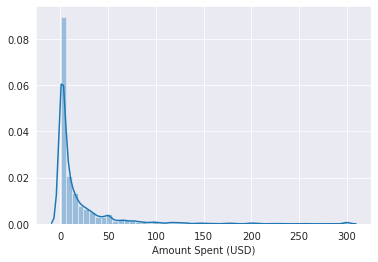

In [0]:
sns.set_style('darkgrid')
sns.distplot(df1['Amount Spent (USD)'])

Create scatter plots for spend and: reach, frequency, impressions and clicks. Do you see a linear relationships? As a result, do you think linear regression will work for this problem?

According to scatterplots showing below, spend has ralatively obvious linear relationship with clicks, reach, and impressions, rather than with frequency. In general, I do think linear regression will work for this problem.

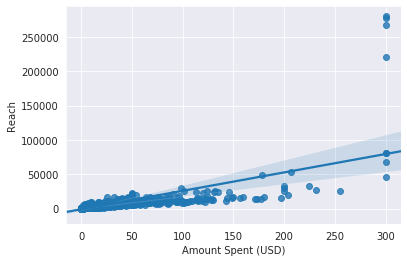

In [0]:
# Reach
sns.jointplot(df1['Amount Spent (USD)'],df1.Reach,kind='reg')

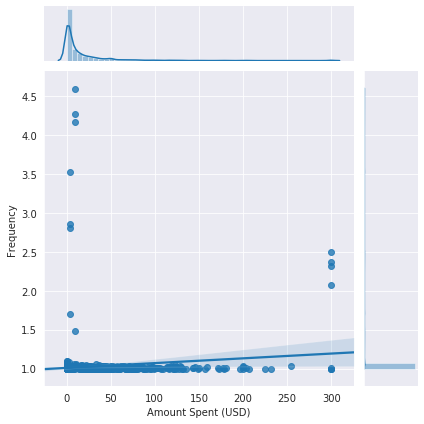

In [0]:
# Frequency
sns.jointplot(df1['Amount Spent (USD)'],df1.Frequency,kind='reg')

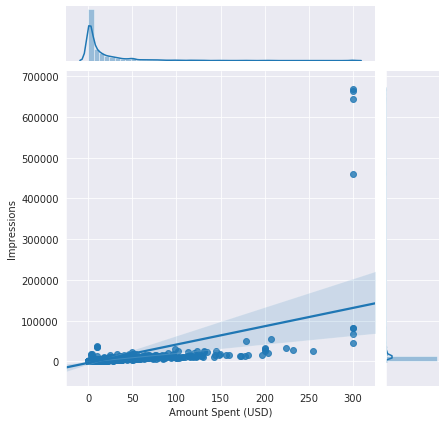

In [0]:
# Impressions
sns.jointplot(df1['Amount Spent (USD)'],df1.Impressions,kind='reg')

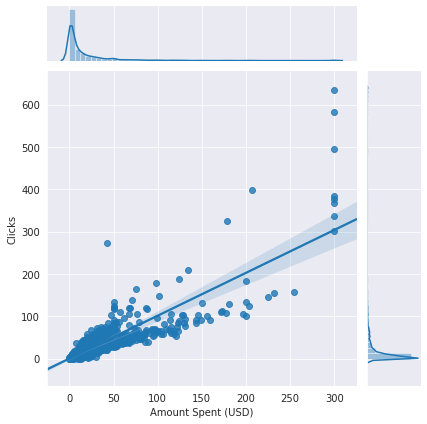

In [0]:
# Clicks
sns.jointplot(df1['Amount Spent (USD)'],df1.Clicks,kind='reg')

# **Question 2**

In [0]:
df1['Campaign Name']=df1['Campaign Name'].str.replace('[^a-zA-Z0-9:\s+]', '')
df1['Campaign Name']=df1['Campaign Name'].str.replace('\d+', '')
df1.loc[df1['Campaign Name'].str.contains('travelpony',case=False),'Campaign Name']='TravelPony'
campaignName=pd.get_dummies(df1['Campaign Name'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [0]:
target=df1['Amount Spent (USD)']
df1.iloc[:,3]=df1.iloc[:,3].astype('category')
dep=pd.concat([campaignName,df1.iloc[:,4:9],df1.iloc[:,10:18]],axis=1)
mod=sm.OLS(target,dep)
res=mod.fit()
print(res.summary())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


                            OLS Regression Results                            
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1360.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:24:41   Log-Likelihood:                -6573.0
No. Observations:                1802   AIC:                         1.318e+04
Df Residuals:                    1784   BIC:                         1.328e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

# **Question 3**

In [0]:
coefs=pd.concat([res.params,res.pvalues],axis=1)
coefs.columns=['coef','p_value']
coefs=coefs.loc[coefs.p_value<0.05]
coefs['rank']=coefs.coef.rank(method='dense',ascending=False).astype(int)
coefs.sort_values('rank').head(3)

,coef,p_value,rank
Page Likes,24.450740,0.009060,1
Post Engagement,18.024142,0.020907,2
Post Shares,4.933423,0.001920,3
